## Open source AI Models with Hugging Face

##### Hugging Face has a large ecosystem that consists of a Git platform and multiple open source libraries such as transformers, diffusers, datasets, accelerate, and much more. 
* You'll need a developer account with Hugging Face and create an access token for this project.
* For this project we need the torch, transformers and sentencepiece Python packages in order to load and use pre-trained models. We will also need the huggingface_hub package to programmatically login to the Hugging Face Hub and manage repositories, and the datasets package to download datasets from the Hub.
* The sentencepiece package is required by transformers to perform inference with some of the pre-trained open source models on Hugging Face Hub and does not need to be explicitly imported. Import the remaining packages as follows.

In [1]:
# !Pip install numpy 
# !pip install pandas
# !pip install datasets==2.13
# !pip install huggingface_hub==0.16.4
# !pip install pyarrow>=8.0.0
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#!pip install --upgrade transformers huggingface-hub



In [2]:
import os
import torch
import huggingface_hub as hf_hub
import datasets 
import transformers

### Task 1: Download Pre-trained Models from the HF Hub

##### Hugging Face Hub as a Git Platform

The Hugging Face website (also known as the Hub) is essentially a Git platform designed to store pretrained models and datasets as Git repositories. Similar to GitHub, it allows users to explore, create, clone, push repositories and so much more. Each pretrained checkpoint has its own repository and in most cases a descriptive README with code snippets to load and run the model. See the bert-base-cased model repository as an example.

* How to Use Pretrained Models

While the Hub is a great place to explore different tasks and pretrained models, we need the transformers or diffusers libraries in order to load and make predictions with pre-trained models. These two libraries reimplement the code of the state-of-the-art ML research such that vastly different models can be downloaded, loaded into memory and used in a unified way with a few lines of code.

In this task, you will learn how to use the Auto classes of transformers and the from_pretrained method to download and load any model on the Hugging Face Hub. For a full list of supported models, refer to the GitHub README.

* What is the Auto Class?

Auto classes of the transformers are simply tools to load models and their data preprocessors in a unified way. Remember, the library reimplements each model such that they each have their own class (BertModel, RobertaModel, T5Model, etc.) with mostly uniform input and output data format across all models. transformers have the following Auto class types to load models and their data preprocessors:

**AutoModel**    
**AutoModelForTASK> (more on this below)**
**AutoTokenizer**
**AutoFeatureExtractor**
**AutoImageProcessor**
**AutoProcessor**

* Loading Models into Memory with from_pretrained

For the first task, you will download the pretrained **"cardiffnlp/twitter-roberta-base-emoji"** model and load the model and its data preprocessor into memory with the from_pretrained(<REPO_NAME_OR_PATH>) method. The "cardiffnlp/twitter-roberta-base-emoji" is a text classification model that is trained to predict the emoji class ID of a given tweet.

In [3]:
#Use the AutoTokenizer and AutoModel classes to download a pre-trained language model from the Hub and load its data preprocessor.
from transformers import AutoTokenizer , AutoModel


#load the pre-trained tokeinzer of the "cardiffnlp/twitter-roberta-base-emoji" model
tokeinzer=AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")


#### What from_pretrained() does

The from_pretrained() method (see docs) first searches for a model repository with the same name on the Hugging Face Hub but it also accepts a local path or a URL with the expected folder structure. You can simply git clone the repository and load it from your local path.

In [4]:
# Print the tokenizer to see the data preprocessing configuration for this model 
print(tokeinzer)

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-emoji', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}


##### **Tokenizers**

NLP models can't process text inputs as it is and need to be converted to a fixed length mathematical format. The `Tokenizer` classes preprocess the text such that each word and punctuation is given a unique ID or a **token**, short sentences are padded and long sentences are truncated to create fixed-size input vectors. They also allow using additional tokens such as _bos, eos, unk, sep_, and more to specify start and end of sentences, and to assign token IDS to unknown words that are not in the tokenizer vocabulary.

The output of the tokenizer tells us this pretrained model uses a tokenizer with a 50265 unique token IDs that applies padding or truncation to the end of each input text, and removes leading (leftside) extra whitespaces. You can always refer to the corresponding Tokenizer [docs](https://huggingface.co/docs/transformers/model_doc/roberta#transformers.RobertaTokenizerFast) to learn more about each preprocessing step.

In [5]:
#load the pre-trained "Cardiffnlp/twitter-roberta-base-emoji" model
model=AutoModel.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emoji and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Notes on Model Loading

Take a look at the warning above. We were only able to load a chunk of the model parameters included in the checkpoint with the AutoModel class.

This is because all transformers models are designed to have a single base class and multiple task-specific prediction classes built on top of it. The AutoModel class is designed to only load the base model parameters such as RobertaModel but not task-specific models such as RobertaForSequenceClassification.

In order to identify the exact class name and task of your target checkpoint, you can simply refer to the model configuration.

In [6]:
#get the model configuration
config=model.config
print(config.architectures)

['RobertaForSequenceClassification']


##### We found out that the pretrained model we are trying to load is an instance of the RobertaForSequenceClassification class.

Important Tip

You don't have to download and print out the configuration to identify the model class name. You can simply navigate to the config.json file within the model repository to find it out.

## Task 2: Downstream Tasks and Task-Specific `AutoModel` Classes

#### Limitations of AutoModel

In the previous task, we learned all about Auto classes and the limitations of the AutoModel class. We also learned that each transformers model consists of a base class and one or more task-specific classes. For example, RoBERTa has the base RobertaModel class and multiple prediction classes such as RobertaForSequenceClassification, RobertaForQuestionAnswering, etc. that leverage the base class. You can always refer to the corresponding model documentation page to see its full list of tasks and classes.* 

Task-Specific AutoModel Classes

Luckily for us, transformers has multiple task-specific AutoModelForTASK classes to load pretrained models. For a full list of Auto classes, take a look at the Auto Classes documentation page.

In this task, you will learn how to load a pretrained model with a task-specific Auto model class.

In [7]:
#load the correct AutoModel Class for RobertaForSequenceClassification
from transformers import AutoModelForSequenceClassification

# Load the pretrained "cardiffnlp/twitter-roberta-base-emoji" model using the correct auto model class
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

## Task 3: Explicit Model and Preprocesser Class Names


##### We learned how to identify the data preprocessor and model class of a model repository on the Hub in the previous task. Note that you can also do this by navigating to the **Files and versions** tab on the repository [page](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji) and taking a look at the [config.json](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji/blob/main/config.json) file.

Similar to models with multiple task-specific model classes, data preprocessor classes are named based on the model name and the modality. 

- `Tokenizer` classes for language models
- `FeatureExtractor` classes for audio models
- `ImageProcessor` classes for computer vision models
- `Processor` classes for multi-modal models

These data preprocessor classes transform raw input data such as text, image, etc. to the format expected by your target pre-trained model. For an vision model, the preprocessor performs steps such as resizing to a fixed size, normalization, cropping, etc. In this task, you will

- Use the "cardiffnlp/twitter-roberta-base-emoji" model we loaded with `Auto` classes before
- Explicitly import a model and its preprocessor class
- Use explicit class names to load a pretrained model and its preprocessor

In [8]:
#import the explicit tokenizer class of cardiffnlp/twitter-roberta-base-emoji
from transformers import RobertaTokenizerFast

#import the explicit model class of cardiffnlp/twitter-roberta-base-emoji"
from transformers import RobertaForSequenceClassification

##### 
We can now use the explicit tokenizer and model classes the same way we use the Auto classes.

In [9]:
tokenizer = RobertaTokenizerFast.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")
model=RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

##  Task 4: Creating an NLP Pipeline - Part 1/2

##### You learned how to navigate the Hugging Face Hub repositories, identify the model and data preprocessor classes of your target repository and how to import and load a pre-trained model and its corresponding preprocessor.

You will now put these skills to use and create powerful language translation pipeline with a few lines of code using the [_google/flan-t5-base_](https://huggingface.co/google/flan-t5-base) model. This multi-lingual translation model allows you to translate between multiple languages. For a full list of languages this model supports, simply refer to its model repository. 

**Text-to-Text Generation**

In transformers, NLP models with text input and output fall under the `AutoModelForSeq2SeqLM` class. This class of pretrained models perform tasks such as translation, question answering and text completion. 

**Inputs for T5**

The tokenizer of T5 preprocesses the raw text input to return its token ids and attention mask. Each token id represents a unique word, tag or punctuation in the model's vocabulary. The attention mask consists of 1s and 0s for each token to decide whether that token should be attended to or ignored by the transformer model.

In this task, you will learn

- What the tokenizer classes do under the hood
- How to preprocess your raw input text 

##### Use the AutoTokenizer and AutoModelForSeq2SeqLM classes to load the pre-trained "google/flan-t5-base" model and its tokenizer
Create a text input that includes
A prompt to specify source and target languages for translation
Text to be translated
Preprocess the text input to retrieve token ids and the attention mask

In [10]:
from transformers import AutoModelForSeq2SeqLM

tokeinzer=AutoTokenizer.from_pretrained("google/flan-t5-base")
model=AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

##### We are ready to perform inference with the pretrained model. We will start by defining an input sentence where we start by which language we would like to translate from and to, and add the sentence to be translated.

In [11]:
#specify source and target languages for translation
source_lang="English"
target_lang="German"

input_text = f" translate {source_lang} to {target_lang} : how old are you ?"

#Use the tokenizer to preprocess input text , with return_tensors ="pt" to return pytorch tensors

inputs=tokeinzer(input_text,return_tensors='pt')

for key, value in inputs.items():
    print(key,value)

input_ids tensor([[13959,  1566,    12,  2968,     3,    10,   149,   625,    33,    25,
             3,    58,     1]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


## Task 5: Creating an NLP Pipeline - Part 2/2

##### You preprocessed the input text and are ready learn how to perform inference. In this task, you will learn 

- How to use `torch.no_grad()` to perform inference fast and efficiently, and reduce memory usage
- How to feed preprocessed inputs to the model
- How to decode model output to make it human readable

Note that `transformers` and `diffusers` libraries support batched inputs, meaning you can inputs multiple text inputs or images, etc. as a list. Regardless of the number of inputs, the preprocess and model classes output batched results where each entry corresponds to an 

Using `torch.no_grad()`

- Pass preprocessed inputs to the loaded model to perform inference
- Save the model output to a variable named outputs
- Decode the model output tokens to human readable formatinput.

In [12]:
# Use torch.no_grad() to prevent gradient accumulation - speeds up inference, reduces memory
with torch.no_grad():
    # Use model.generate method to perform inference
    # Use **inputs to pass the unpacked dictionary as multiple arguments to the generate method 
    outputs = model.generate(**inputs)

# The output is a list of length batch_size - number of input texts - which is 1 in this case
# Print the length of outputs list
print(len(outputs))
print(outputs)

C:\Users\amamidwar\AppData\Local\anaconda3\envs\Venv_Learning\Lib\site-packages\transformers\generation\utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


1
tensor([[  0, 587, 625, 436, 292,  58,   1]])


##### The model output is a sequence of token IDs, where each token represents a unique word or punctuation in the vocabular. To decode it to a human readable format, we just need to map each token ID to its corresponding word. All Tokenizer classes of transformers provides a convenient decode method to do this.

In [13]:
#use the decode method of the tokenizer to convert the output to a human readable format

print(tokeinzer.decode(outputs[0]))

<pad> wie old sind Sie?</s>


## Task 6: Datasets Library

##### The `transformers` library is designed to make it easy to load and use pre-trained models, and to preprocess raw input data. However, it is up to you to find or create interesting datasets.

We will now take a look at the `datasets` library and learn how to find, download and create datasets with a few lines of code. This library is part of the Hugging Face ecosystem, and similar to `transformers` and `diffusers`, is tightly integrated with the Hugging Face Hub. Each library is stored as a Git repository on the Hub and can be downloaded with a single line of code.

In this task, you will learn

- How to use the `load_dataset()` function to download and load a dataset from the Hub
- How to only download a specific data split (training, validation, test)

##### Intructions
- Import the `load_dataset()` function from datasets
- Load the `"adirik/fashion_image_caption-100"` dataset
- Print the dataset to see what features it contains
- Print a sample of the dataset
- Download only the training split of the dataset

In [14]:
#!pip install datasets --upgrade

In [15]:
from datasets import load_dataset

#use the load_dataset function to load the "adirik/fashion_image_caption-100"

dataset=load_dataset("adirik/fashion_image_caption-100",cache_dir=r'C:\Users\amamidwar\AppData')

#print the dataset object
print(dataset)

Generating train split:   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 100
    })
})


In [46]:
#print the type of dataset variable
print(type(dataset),"\n")

print(dataset['train'][7])

<class 'datasets.dataset_dict.DatasetDict'> 

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=384x384 at 0x20385D38C50>, 'text': 'A dress with Color: Green, Department: Dresses, Detail: Button Front, Fabric-Elasticity: No Sretch, Fit: Fitted, Hemline: Flared, Material: Gabardine, Neckline: Collared, Pattern: Floral, Sleeve-Length: Sleeveless, Style: Casual, Type: Button Up Shirt, Waistline: High'}


##### Each dataset is a dictionary with train, and optionally val and test splits. Each split contains an iterable subset  of the data with one or more keys that represent the features of the dataset defined by the dataset owner. For example, the "adirik/fashion_image_caption-100" dataset contains image and text keys.

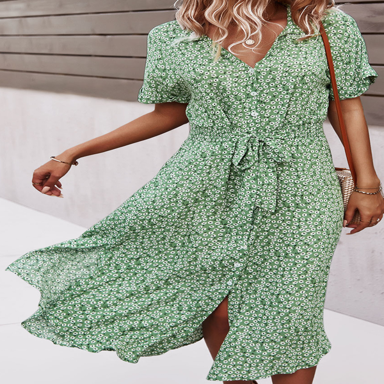

In [44]:
#visualize the image of teh first data sample
dataset['train'][7]['image']   #iloc value do not work on dataset , syntax to get values from dataset -dataset['train'][column_name][row_index]

##### You can also opt to download only a specific split of the dataset or pass in the `streaming=True` argument in order to download smaller subsets.

In [45]:
dataset_train=load_dataset("adirik/fashion_image_caption-100", split="train")
dataset_train

Generating train split:   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'text'],
    num_rows: 100
})

## Task 7: CV / Multi-Modal Pipeline - Part 1/2

##### We learned to how download datasets easily with the datasets library and tricks such as streaming to download data samples one by one if we don't have sufficient disk space for the whole dataset.

As demonstrated in the previous task, the image captions of the `"adirik/fashion_image_caption-100"` dataset are not very high quality. Could we create a better version of this dataset? Let's first setup an image captioning pipeline to see if we can generate better captions.

In this task, you will learn

- How to create an multi-modal / image captioning pipeline with [BLIP](https://huggingface.co/docs/transformers/main/en/model_doc/blip)
- How to use `datasets` library datasets as input to `transformers` models
- How to postprocess / decode BLIP output to retrieve human-readable captions

#### Take a look at the `Salesforce/blip-image-captioning-base` repository on the Hugging Face Hub and determine the model and preprocessor classes.

- Import the correct preprocessor and model classes from transformers
- Using the `from_pretrained()` method
    - Create a preprocessor 
    - Download and load the pre-trained model
- Perform inference with a single image sample
- Decode model output

In [49]:
#import the cotrrect BLIP processor(since its multi-modal hence processor and not tokenizer) and model class from transformers

from transformers import BlipProcessor, BlipForConditionalGeneration

#load processor of "Salesforce/blip-image-captioning-base"
processor=BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

#load the pre-trained model "Salesforce/blip-image-captioning-base"
model=BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

C:\Users\amamidwar\AppData\Local\anaconda3\envs\Venv_Learning\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\amamidwar\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

##### Data preprocessor classes of Python are designed for ease of use. You can simply pass in a single or a list of Pillow image/s, url/s or local path/s to your image as the main argument to `ImageProcessor` class instances. 

In [53]:
#preprocess the 7th image of the dataset , return result as pytorch tensors
inputs=processor(images=dataset_train[7]['image'],return_tensors='pt')

for key, value in inputs.items():
    print(key,value.shape)

pixel_values torch.Size([1, 3, 384, 384])


##### the above size represent:- 
- The first dimension [1] indicates that there is only one image in the tensor. This is often referred to as the batch dimension.- 
The second dimension [3] represents the number of channels in the image. In this case, there are three channels, likely representing the Red, Green, and Blue (RGB) channels.-  
The third and fourth dimensions [384, 384] represent the height and width of the image, respectively. So, the image is 384 pixels high and 384 pixels wide.


##### The inference is almost the same as the NLP task as BLIP is a conditional text generation model. We will need to call `model.generate()` to run the model and use the `decode` method of the preprocessor to convert the output caption to a human readable format.

In [56]:
#Use torch.no_grad() to prevent gradient accumulation - speeds up inference, reduces memory
with torch.no_grad():
    #predict caption using the generate method of model
    outputs=model.generate(**inputs)

#decode the model output , human understandable form

caption=processor.decode(outputs[0],skip_special_tokens=True)

#print decoded caption
print(caption)


C:\Users\amamidwar\AppData\Local\anaconda3\envs\Venv_Learning\Lib\site-packages\transformers\generation\utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a woman wearing a green floral print dress
